ĺ


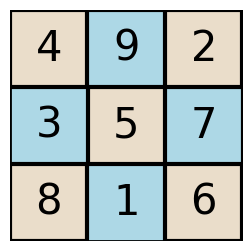

In [2]:
from itertools import combinations
from Logica import *
from Logica import Otoria, Ytoria, Descriptor, inorder_to_tree
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from types import MethodType
from Rejilla import *
from Logica_Tseitin import *

r = Rejilla(X=3, Y=3)
print(r.CM.ravel([4, 0, 2]))

numero_8 = r.CM.ravel([7, 0, 0])
numero_3 = r.CM.ravel([2, 0, 1])
numero_4 = r.CM.ravel([3, 0, 2])
numero_1 = r.CM.ravel([0, 1, 0])
numero_5 = r.CM.ravel([4, 1, 1])
numero_9 = r.CM.ravel([8, 1, 2])
numero_6 = r.CM.ravel([5, 2, 0])
numero_7 = r.CM.ravel([6, 2, 1])
numero_2 = r.CM.ravel([1, 2, 2])
I = {
    numero_8 : True,
    numero_3 : True,
    numero_4 : True,
    numero_1 : True,
    numero_5 : True,
    numero_9 : True,
    numero_6 : True,
    numero_7 : True,
    numero_2 : True
}
r.visualizar(I)


#0, 2   1, 2   2, 2
#0, 1   1, 1   2, 1
#0, 0   1, 0   2, 0

In [3]:
print(r.regla1())

((((((((((((((((ĀOā)OĂ)Oă)OĄ)Oą)OĆ)Oć)OĈ)Y((((((((ěOĜ)Oĝ)OĞ)Oğ)OĠ)Oġ)OĢ)Oģ))Y((((((((ĶOķ)Oĸ)OĹ)Oĺ)OĻ)Oļ)OĽ)Oľ))Y((((((((ĉOĊ)Oċ)OČ)Oč)OĎ)Oď)OĐ)Ođ))Y((((((((ĤOĥ)OĦ)Oħ)OĨ)Oĩ)OĪ)Oī)OĬ))Y((((((((ĿOŀ)OŁ)Oł)OŃ)Oń)OŅ)Oņ)OŇ))Y((((((((ĒOē)OĔ)Oĕ)OĖ)Oė)OĘ)Oę)OĚ))Y((((((((ĭOĮ)Oį)Oİ)Oı)OĲ)Oĳ)OĴ)Oĵ))Y((((((((ňOŉ)OŊ)Oŋ)OŌ)Oō)OŎ)Oŏ)OŐ))


In [4]:
def a_clausal(A):
    # Subrutina de Tseitin para encontrar la FNC de
    # la formula en la pila
    # Input: A (cadena) de la forma
    #                   p=-q
    #                   p=(qYr)
    #                   p=(qOr)
    #                   p=(q>r)
    # Output: B (cadena), equivalente en FNC
    assert(len(A)==4 or len(A)==7), u"Fórmula incorrecta!"
    B = ''
    p = A[0]
    # print('p', p)
    if "-" in A:
        q = A[-1]
        # print('q', q)
        B = "-"+p+"O-"+q+"Y"+p+"O"+q
    elif "Y" in A:
        q = A[3]
        # print('q', q)
        r = A[5]
        # print('r', r)
        B = q+"O-"+p+"Y"+r+"O-"+p+"Y-"+q+"O-"+r+"O"+p
    elif "O" in A:
        q = A[3]
        # print('q', q)
        r = A[5]
        # print('r', r)
        B = "-"+q+"O"+p+"Y-"+r+"O"+p+"Y"+q+"O"+r+"O-"+p
    elif ">" in A:
        q = A[3]
        # print('q', q)
        r = A[5]
        # print('r', r)
        B = q+"O"+p+"Y-"+r+"O"+p+"Y-"+q+"O"+r+"O-"+p
    elif "=" in A:
        q = A[3]
        # print('q', q)
        r = A[5]
        # print('r', r)
        #qO-rO-pY-qOrO-pY-qO-rOpYqOrOp
        B = q+"O"+"-"+r+"O"+"-"+p+"Y"+"-"+q+"O"+r+"O"+"-"+p+"Y"+"-"+q+"O"+"-"+r+"O"+p+"Y"+q+"O"+r+"O"+p
    else:
        print(u'Error enENC(): Fórmula incorrecta!')
    B = B.split('Y')
    B = [c.split('O') for c in B]
    return B

In [5]:
def tseitin(A):
    '''
    Algoritmo de transformacion de Tseitin
    Input: A (cadena) en notacion inorder
    Output: B (cadena), Tseitin
    '''
    # Creamos letras proposicionales nuevas
    f = inorder_to_tree(A)
    letrasp = f.letras()
    cods_letras = [ord(x) for x in letrasp]
    m = max(cods_letras) + 256
    letrasp_tseitin = [chr(x) for x in range(m, m + f.num_conec())]   # <-------------- this linea se cambia en el parcial 
    letrasp = list(letrasp) + letrasp_tseitin
    L = [] # Inicializamos lista de conjunciones
    Pila = [] # Inicializamos pila
    i = -1 # Inicializamos contador de variables nuevas
    s = A[0] # Inicializamos símbolo de trabajo
    while len(A) > 0: # Recorremos la cadena
        # print("Pila:", Pila, " L:", L, " s:", s)
        if (s in letrasp) and (len(Pila) > 0) and (Pila[-1]=='-'):
            i += 1
            atomo = letrasp_tseitin[i]
            Pila = Pila[:-1]
            Pila.append(atomo)
            L.append(atomo + "=-" + s)
            A = A[1:]
            if len(A) > 0:
                s = A[0]
        elif s == ')':
            w = Pila[-1]
            O = Pila[-2]
            v = Pila[-3]
            Pila = Pila[:len(Pila)-4]
            i += 1
            atomo = letrasp_tseitin[i]
            L.append(atomo + "=(" + v + O + w + ")")
            s = atomo
        else:
            Pila.append(s)
            A = A[1:]
            if len(A) > 0:
                s = A[0]
    if i < 0:
        atomo = Pila[-1]
    else:
        atomo = letrasp_tseitin[i]
    B = [[atomo]] + [a_clausal(x) for x in L]
    return B


In [6]:
A = r.regla1()
print(tseitin(str(A)))

[['ʟ'], [['-Ā', 'ɐ'], ['-ā', 'ɐ'], ['Ā', 'ā', '-ɐ']], [['-ɐ', 'ɑ'], ['-Ă', 'ɑ'], ['ɐ', 'Ă', '-ɑ']], [['-ɑ', 'ɒ'], ['-ă', 'ɒ'], ['ɑ', 'ă', '-ɒ']], [['-ɒ', 'ɓ'], ['-Ą', 'ɓ'], ['ɒ', 'Ą', '-ɓ']], [['-ɓ', 'ɔ'], ['-ą', 'ɔ'], ['ɓ', 'ą', '-ɔ']], [['-ɔ', 'ɕ'], ['-Ć', 'ɕ'], ['ɔ', 'Ć', '-ɕ']], [['-ɕ', 'ɖ'], ['-ć', 'ɖ'], ['ɕ', 'ć', '-ɖ']], [['-ɖ', 'ɗ'], ['-Ĉ', 'ɗ'], ['ɖ', 'Ĉ', '-ɗ']], [['-ě', 'ɘ'], ['-Ĝ', 'ɘ'], ['ě', 'Ĝ', '-ɘ']], [['-ɘ', 'ə'], ['-ĝ', 'ə'], ['ɘ', 'ĝ', '-ə']], [['-ə', 'ɚ'], ['-Ğ', 'ɚ'], ['ə', 'Ğ', '-ɚ']], [['-ɚ', 'ɛ'], ['-ğ', 'ɛ'], ['ɚ', 'ğ', '-ɛ']], [['-ɛ', 'ɜ'], ['-Ġ', 'ɜ'], ['ɛ', 'Ġ', '-ɜ']], [['-ɜ', 'ɝ'], ['-ġ', 'ɝ'], ['ɜ', 'ġ', '-ɝ']], [['-ɝ', 'ɞ'], ['-Ģ', 'ɞ'], ['ɝ', 'Ģ', '-ɞ']], [['-ɞ', 'ɟ'], ['-ģ', 'ɟ'], ['ɞ', 'ģ', '-ɟ']], [['ɗ', '-ɠ'], ['ɟ', '-ɠ'], ['-ɗ', '-ɟ', 'ɠ']], [['-Ķ', 'ɡ'], ['-ķ', 'ɡ'], ['Ķ', 'ķ', '-ɡ']], [['-ɡ', 'ɢ'], ['-ĸ', 'ɢ'], ['ɡ', 'ĸ', '-ɢ']], [['-ɢ', 'ɣ'], ['-Ĺ', 'ɣ'], ['ɢ', 'Ĺ', '-ɣ']], [['-ɣ', 'ɤ'], ['-ĺ', 'ɤ'], ['ɣ', 'ĺ', '-ɤ']], [['-ɤ', 'ɥ'], ['-Ļ', 'ɥ']

In [7]:
A = r.regla2()
print(tseitin(str(A)))

[['ʟ'], [['-Ā', 'ɐ'], ['-ā', 'ɐ'], ['Ā', 'ā', '-ɐ']], [['-ɐ', 'ɑ'], ['-Ă', 'ɑ'], ['ɐ', 'Ă', '-ɑ']], [['-ɑ', 'ɒ'], ['-ă', 'ɒ'], ['ɑ', 'ă', '-ɒ']], [['-ɒ', 'ɓ'], ['-Ą', 'ɓ'], ['ɒ', 'Ą', '-ɓ']], [['-ɓ', 'ɔ'], ['-ą', 'ɔ'], ['ɓ', 'ą', '-ɔ']], [['-ɔ', 'ɕ'], ['-Ć', 'ɕ'], ['ɔ', 'Ć', '-ɕ']], [['-ɕ', 'ɖ'], ['-ć', 'ɖ'], ['ɕ', 'ć', '-ɖ']], [['-ɖ', 'ɗ'], ['-Ĉ', 'ɗ'], ['ɖ', 'Ĉ', '-ɗ']], [['-ě', 'ɘ'], ['-Ĝ', 'ɘ'], ['ě', 'Ĝ', '-ɘ']], [['-ɘ', 'ə'], ['-ĝ', 'ə'], ['ɘ', 'ĝ', '-ə']], [['-ə', 'ɚ'], ['-Ğ', 'ɚ'], ['ə', 'Ğ', '-ɚ']], [['-ɚ', 'ɛ'], ['-ğ', 'ɛ'], ['ɚ', 'ğ', '-ɛ']], [['-ɛ', 'ɜ'], ['-Ġ', 'ɜ'], ['ɛ', 'Ġ', '-ɜ']], [['-ɜ', 'ɝ'], ['-ġ', 'ɝ'], ['ɜ', 'ġ', '-ɝ']], [['-ɝ', 'ɞ'], ['-Ģ', 'ɞ'], ['ɝ', 'Ģ', '-ɞ']], [['-ɞ', 'ɟ'], ['-ģ', 'ɟ'], ['ɞ', 'ģ', '-ɟ']], [['ɗ', '-ɠ'], ['ɟ', '-ɠ'], ['-ɗ', '-ɟ', 'ɠ']], [['-Ķ', 'ɡ'], ['-ķ', 'ɡ'], ['Ķ', 'ķ', '-ɡ']], [['-ɡ', 'ɢ'], ['-ĸ', 'ɢ'], ['ɡ', 'ĸ', '-ɢ']], [['-ɢ', 'ɣ'], ['-Ĺ', 'ɣ'], ['ɢ', 'Ĺ', '-ɣ']], [['-ɣ', 'ɤ'], ['-ĺ', 'ɤ'], ['ɣ', 'ĺ', '-ɤ']], [['-ɤ', 'ɥ'], ['-Ļ', 'ɥ']

In [8]:
A = r.regla3()
print(tseitin(str(A)))

[['\u05c9'], [['-Ā', 'ɐ'], ['-ě', 'ɐ'], ['Ā', 'ě', '-ɐ']], [['-ɐ', 'ɑ'], ['-Ķ', 'ɑ'], ['ɐ', 'Ķ', '-ɑ']], [['-ɑ', 'ɒ'], ['-ĉ', 'ɒ'], ['ɑ', 'ĉ', '-ɒ']], [['-ɒ', 'ɓ'], ['-Ĥ', 'ɓ'], ['ɒ', 'Ĥ', '-ɓ']], [['-ɓ', 'ɔ'], ['-Ŀ', 'ɔ'], ['ɓ', 'Ŀ', '-ɔ']], [['-ɔ', 'ɕ'], ['-Ē', 'ɕ'], ['ɔ', 'Ē', '-ɕ']], [['-ɕ', 'ɖ'], ['-ĭ', 'ɖ'], ['ɕ', 'ĭ', '-ɖ']], [['-ɖ', 'ɗ'], ['-ň', 'ɗ'], ['ɖ', 'ň', '-ɗ']], [['-ě', 'ɘ'], ['-Ķ', 'ɘ'], ['ě', 'Ķ', '-ɘ']], [['-ɘ', 'ə'], ['-ĉ', 'ə'], ['ɘ', 'ĉ', '-ə']], [['-ə', 'ɚ'], ['-Ĥ', 'ɚ'], ['ə', 'Ĥ', '-ɚ']], [['-ɚ', 'ɛ'], ['-Ŀ', 'ɛ'], ['ɚ', 'Ŀ', '-ɛ']], [['-ɛ', 'ɜ'], ['-Ē', 'ɜ'], ['ɛ', 'Ē', '-ɜ']], [['-ɜ', 'ɝ'], ['-ĭ', 'ɝ'], ['ɜ', 'ĭ', '-ɝ']], [['-ɝ', 'ɞ'], ['-ň', 'ɞ'], ['ɝ', 'ň', '-ɞ']], [['-ɟ', '-ɞ'], ['ɟ', 'ɞ']], [['Ā', 'ɠ'], ['-ɟ', 'ɠ'], ['-Ā', 'ɟ', '-ɠ']], [['ɗ', '-ɡ'], ['ɠ', '-ɡ'], ['-ɗ', '-ɠ', 'ɡ']], [['-Ā', 'ɢ'], ['-Ķ', 'ɢ'], ['Ā', 'Ķ', '-ɢ']], [['-ɢ', 'ɣ'], ['-ĉ', 'ɣ'], ['ɢ', 'ĉ', '-ɣ']], [['-ɣ', 'ɤ'], ['-Ĥ', 'ɤ'], ['ɣ', 'Ĥ', '-ɤ']], [['-ɤ', 'ɥ'], ['-Ŀ', 'ɥ'], ['ɤ', 'Ŀ', 

In [9]:
A = r.regla4()
print(tseitin(str(A)))

[['ψ'], [['Ā', '-ɐ'], ['Đ', '-ɐ'], ['-Ā', '-Đ', 'ɐ']], [['ɐ', '-ɑ'], ['Ě', '-ɑ'], ['-ɐ', '-Ě', 'ɑ']], [['Ā', '-ɒ'], ['đ', '-ɒ'], ['-Ā', '-đ', 'ɒ']], [['ɒ', '-ɓ'], ['ę', '-ɓ'], ['-ɒ', '-ę', 'ɓ']], [['-ɑ', 'ɔ'], ['-ɓ', 'ɔ'], ['ɑ', 'ɓ', '-ɔ']], [['ā', '-ɕ'], ['ď', '-ɕ'], ['-ā', '-ď', 'ɕ']], [['ɕ', '-ɖ'], ['Ě', '-ɖ'], ['-ɕ', '-Ě', 'ɖ']], [['-ɔ', 'ɗ'], ['-ɖ', 'ɗ'], ['ɔ', 'ɖ', '-ɗ']], [['ā', '-ɘ'], ['đ', '-ɘ'], ['-ā', '-đ', 'ɘ']], [['ɘ', '-ə'], ['Ę', '-ə'], ['-ɘ', '-Ę', 'ə']], [['-ɗ', 'ɚ'], ['-ə', 'ɚ'], ['ɗ', 'ə', '-ɚ']], [['Ă', '-ɛ'], ['Ď', '-ɛ'], ['-Ă', '-Ď', 'ɛ']], [['ɛ', '-ɜ'], ['Ě', '-ɜ'], ['-ɛ', '-Ě', 'ɜ']], [['-ɚ', 'ɝ'], ['-ɜ', 'ɝ'], ['ɚ', 'ɜ', '-ɝ']], [['Ă', '-ɞ'], ['ď', '-ɞ'], ['-Ă', '-ď', 'ɞ']], [['ɞ', '-ɟ'], ['ę', '-ɟ'], ['-ɞ', '-ę', 'ɟ']], [['-ɝ', 'ɠ'], ['-ɟ', 'ɠ'], ['ɝ', 'ɟ', '-ɠ']], [['Ă', '-ɡ'], ['Đ', '-ɡ'], ['-Ă', '-Đ', 'ɡ']], [['ɡ', '-ɢ'], ['Ę', '-ɢ'], ['-ɡ', '-Ę', 'ɢ']], [['-ɠ', 'ɣ'], ['-ɢ', 'ɣ'], ['ɠ', 'ɢ', '-ɣ']], [['Ă', '-ɤ'], ['đ', '-ɤ'], ['-Ă', '-đ', 'ɤ']], [['ɤ', '-ɥ'

In [10]:
A = r.regla5()
print(tseitin(str(A)))

[['ψ'], [['Ā', '-ɐ'], ['Ģ', '-ɐ'], ['-Ā', '-Ģ', 'ɐ']], [['ɐ', '-ɑ'], ['ľ', '-ɑ'], ['-ɐ', '-ľ', 'ɑ']], [['Ā', '-ɒ'], ['ģ', '-ɒ'], ['-Ā', '-ģ', 'ɒ']], [['ɒ', '-ɓ'], ['Ľ', '-ɓ'], ['-ɒ', '-Ľ', 'ɓ']], [['-ɑ', 'ɔ'], ['-ɓ', 'ɔ'], ['ɑ', 'ɓ', '-ɔ']], [['ā', '-ɕ'], ['ġ', '-ɕ'], ['-ā', '-ġ', 'ɕ']], [['ɕ', '-ɖ'], ['ľ', '-ɖ'], ['-ɕ', '-ľ', 'ɖ']], [['-ɔ', 'ɗ'], ['-ɖ', 'ɗ'], ['ɔ', 'ɖ', '-ɗ']], [['ā', '-ɘ'], ['ģ', '-ɘ'], ['-ā', '-ģ', 'ɘ']], [['ɘ', '-ə'], ['ļ', '-ə'], ['-ɘ', '-ļ', 'ə']], [['-ɗ', 'ɚ'], ['-ə', 'ɚ'], ['ɗ', 'ə', '-ɚ']], [['Ă', '-ɛ'], ['Ġ', '-ɛ'], ['-Ă', '-Ġ', 'ɛ']], [['ɛ', '-ɜ'], ['ľ', '-ɜ'], ['-ɛ', '-ľ', 'ɜ']], [['-ɚ', 'ɝ'], ['-ɜ', 'ɝ'], ['ɚ', 'ɜ', '-ɝ']], [['Ă', '-ɞ'], ['ġ', '-ɞ'], ['-Ă', '-ġ', 'ɞ']], [['ɞ', '-ɟ'], ['Ľ', '-ɟ'], ['-ɞ', '-Ľ', 'ɟ']], [['-ɝ', 'ɠ'], ['-ɟ', 'ɠ'], ['ɝ', 'ɟ', '-ɠ']], [['Ă', '-ɡ'], ['Ģ', '-ɡ'], ['-Ă', '-Ģ', 'ɡ']], [['ɡ', '-ɢ'], ['ļ', '-ɢ'], ['-ɡ', '-ļ', 'ɢ']], [['-ɠ', 'ɣ'], ['-ɢ', 'ɣ'], ['ɠ', 'ɢ', '-ɣ']], [['Ă', '-ɤ'], ['ģ', '-ɤ'], ['-Ă', '-ģ', 'ɤ']], [['ɤ', '-ɥ'

In [11]:
A = r.regla6_1()
print(tseitin(str(A)))

[['ˌ'], [['Ā', '-ɐ'], ['ī', '-ɐ'], ['-Ā', '-ī', 'ɐ']], [['ɐ', '-ɑ'], ['Ő', '-ɑ'], ['-ɐ', '-Ő', 'ɑ']], [['Ā', '-ɒ'], ['Ĭ', '-ɒ'], ['-Ā', '-Ĭ', 'ɒ']], [['ɒ', '-ɓ'], ['ŏ', '-ɓ'], ['-ɒ', '-ŏ', 'ɓ']], [['-ɑ', 'ɔ'], ['-ɓ', 'ɔ'], ['ɑ', 'ɓ', '-ɔ']], [['ā', '-ɕ'], ['Ī', '-ɕ'], ['-ā', '-Ī', 'ɕ']], [['ɕ', '-ɖ'], ['Ő', '-ɖ'], ['-ɕ', '-Ő', 'ɖ']], [['-ɔ', 'ɗ'], ['-ɖ', 'ɗ'], ['ɔ', 'ɖ', '-ɗ']], [['ā', '-ɘ'], ['Ĭ', '-ɘ'], ['-ā', '-Ĭ', 'ɘ']], [['ɘ', '-ə'], ['Ŏ', '-ə'], ['-ɘ', '-Ŏ', 'ə']], [['-ɗ', 'ɚ'], ['-ə', 'ɚ'], ['ɗ', 'ə', '-ɚ']], [['Ă', '-ɛ'], ['ĩ', '-ɛ'], ['-Ă', '-ĩ', 'ɛ']], [['ɛ', '-ɜ'], ['Ő', '-ɜ'], ['-ɛ', '-Ő', 'ɜ']], [['-ɚ', 'ɝ'], ['-ɜ', 'ɝ'], ['ɚ', 'ɜ', '-ɝ']], [['Ă', '-ɞ'], ['Ī', '-ɞ'], ['-Ă', '-Ī', 'ɞ']], [['ɞ', '-ɟ'], ['ŏ', '-ɟ'], ['-ɞ', '-ŏ', 'ɟ']], [['-ɝ', 'ɠ'], ['-ɟ', 'ɠ'], ['ɝ', 'ɟ', '-ɠ']], [['Ă', '-ɡ'], ['ī', '-ɡ'], ['-Ă', '-ī', 'ɡ']], [['ɡ', '-ɢ'], ['Ŏ', '-ɢ'], ['-ɡ', '-Ŏ', 'ɢ']], [['-ɠ', 'ɣ'], ['-ɢ', 'ɣ'], ['ɠ', 'ɢ', '-ɣ']], [['Ă', '-ɤ'], ['Ĭ', '-ɤ'], ['-Ă', '-Ĭ', 'ɤ']], [['ɤ', '-ɥ'

In [12]:
A = r.regla6_2()
print(tseitin(str(A)))

[['ʺ'], [['Ē', '-Ⱦ'], ['ī', '-Ⱦ'], ['-Ē', '-ī', 'Ⱦ']], [['Ⱦ', '-ȿ'], ['ľ', '-ȿ'], ['-Ⱦ', '-ľ', 'ȿ']], [['Ē', '-ɀ'], ['Ĭ', '-ɀ'], ['-Ē', '-Ĭ', 'ɀ']], [['ɀ', '-Ɂ'], ['Ľ', '-Ɂ'], ['-ɀ', '-Ľ', 'Ɂ']], [['-ȿ', 'ɂ'], ['-Ɂ', 'ɂ'], ['ȿ', 'Ɂ', '-ɂ']], [['ē', '-Ƀ'], ['Ī', '-Ƀ'], ['-ē', '-Ī', 'Ƀ']], [['Ƀ', '-Ʉ'], ['ľ', '-Ʉ'], ['-Ƀ', '-ľ', 'Ʉ']], [['-ɂ', 'Ʌ'], ['-Ʉ', 'Ʌ'], ['ɂ', 'Ʉ', '-Ʌ']], [['ē', '-Ɇ'], ['Ĭ', '-Ɇ'], ['-ē', '-Ĭ', 'Ɇ']], [['Ɇ', '-ɇ'], ['ļ', '-ɇ'], ['-Ɇ', '-ļ', 'ɇ']], [['-Ʌ', 'Ɉ'], ['-ɇ', 'Ɉ'], ['Ʌ', 'ɇ', '-Ɉ']], [['Ĕ', '-ɉ'], ['ĩ', '-ɉ'], ['-Ĕ', '-ĩ', 'ɉ']], [['ɉ', '-Ɋ'], ['ľ', '-Ɋ'], ['-ɉ', '-ľ', 'Ɋ']], [['-Ɉ', 'ɋ'], ['-Ɋ', 'ɋ'], ['Ɉ', 'Ɋ', '-ɋ']], [['Ĕ', '-Ɍ'], ['Ī', '-Ɍ'], ['-Ĕ', '-Ī', 'Ɍ']], [['Ɍ', '-ɍ'], ['Ľ', '-ɍ'], ['-Ɍ', '-Ľ', 'ɍ']], [['-ɋ', 'Ɏ'], ['-ɍ', 'Ɏ'], ['ɋ', 'ɍ', '-Ɏ']], [['Ĕ', '-ɏ'], ['ī', '-ɏ'], ['-Ĕ', '-ī', 'ɏ']], [['ɏ', '-ɐ'], ['ļ', '-ɐ'], ['-ɏ', '-ļ', 'ɐ']], [['-Ɏ', 'ɑ'], ['-ɐ', 'ɑ'], ['Ɏ', 'ɐ', '-ɑ']], [['Ĕ', '-ɒ'], ['Ĭ', '-ɒ'], ['-Ĕ', '-Ĭ', 'ɒ']], [['ɒ', '-ɓ'

In [15]:
A = r.regla3()
B = r.regla4()

C = '(' + str(B) + 'Y' + str(A) + ')'
print(tseitin(str(C)))

[['݃'], [['Ā', '-ɐ'], ['Đ', '-ɐ'], ['-Ā', '-Đ', 'ɐ']], [['ɐ', '-ɑ'], ['Ě', '-ɑ'], ['-ɐ', '-Ě', 'ɑ']], [['Ā', '-ɒ'], ['đ', '-ɒ'], ['-Ā', '-đ', 'ɒ']], [['ɒ', '-ɓ'], ['ę', '-ɓ'], ['-ɒ', '-ę', 'ɓ']], [['-ɑ', 'ɔ'], ['-ɓ', 'ɔ'], ['ɑ', 'ɓ', '-ɔ']], [['ā', '-ɕ'], ['ď', '-ɕ'], ['-ā', '-ď', 'ɕ']], [['ɕ', '-ɖ'], ['Ě', '-ɖ'], ['-ɕ', '-Ě', 'ɖ']], [['-ɔ', 'ɗ'], ['-ɖ', 'ɗ'], ['ɔ', 'ɖ', '-ɗ']], [['ā', '-ɘ'], ['đ', '-ɘ'], ['-ā', '-đ', 'ɘ']], [['ɘ', '-ə'], ['Ę', '-ə'], ['-ɘ', '-Ę', 'ə']], [['-ɗ', 'ɚ'], ['-ə', 'ɚ'], ['ɗ', 'ə', '-ɚ']], [['Ă', '-ɛ'], ['Ď', '-ɛ'], ['-Ă', '-Ď', 'ɛ']], [['ɛ', '-ɜ'], ['Ě', '-ɜ'], ['-ɛ', '-Ě', 'ɜ']], [['-ɚ', 'ɝ'], ['-ɜ', 'ɝ'], ['ɚ', 'ɜ', '-ɝ']], [['Ă', '-ɞ'], ['ď', '-ɞ'], ['-Ă', '-ď', 'ɞ']], [['ɞ', '-ɟ'], ['ę', '-ɟ'], ['-ɞ', '-ę', 'ɟ']], [['-ɝ', 'ɠ'], ['-ɟ', 'ɠ'], ['ɝ', 'ɟ', '-ɠ']], [['Ă', '-ɡ'], ['Đ', '-ɡ'], ['-Ă', '-Đ', 'ɡ']], [['ɡ', '-ɢ'], ['Ę', '-ɢ'], ['-ɡ', '-Ę', 'ɢ']], [['-ɠ', 'ɣ'], ['-ɢ', 'ɣ'], ['ɠ', 'ɢ', '-ɣ']], [['Ă', '-ɤ'], ['đ', '-ɤ'], ['-Ă', '-đ', 'ɤ']], [['ɤ', '-ɥ'